# Principal Component Analysis 

Consider the data sets below: Data set 1 = Spiral data, Data set 2 = Point cloud data, and Data set 3 = simple data. We t the data first. 
 
We are interested in the following;

(1) Which of the three data sets D1, D2, and D3 would be the most appropriate for PCA analysis, in terms of dimensionality reduction (2D to 1D)? Why?

(2) Which of the three data sets D1, D2, and D3 would be the least appropriate for  PCA analysis, in terms of dimensionality reduction (2D to 1D)? Why?


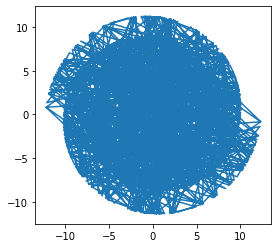

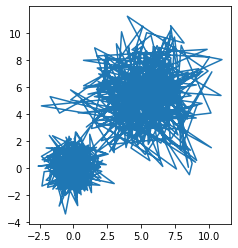

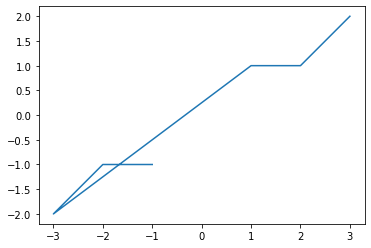

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""
Data set 1 : D1 = spiral like data

- This is a variation on the parametric plot for a circle [cos(t), sin(t)], with a gradually increasing radius. 
"""


# data set 1 [x, y]
t = np.random.rand(400)*np.pi*3
x = np.append(np.cos(t)*np.sqrt(t)*4,   np.cos(t-np.pi)*np.sqrt(t+0.2)*4)
y = np.append(np.sin(t)*np.sqrt(t)*4,  np.sin(t-np.pi)*np.sqrt(t+0.2)*4)

D1 = np.vstack((x,y)).T

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D1[:,0] , D1[:,1])



"""
Data set 2 : D2 = point cloud data (normal distribution)
"""

x = np.append(np.random.normal(0,1,400),   np.random.normal(5.3,2,400))
y = np.append(np.random.normal(0,1,400),   np.random.normal(5.3,2,400))

D2 = np.vstack((x,y)).T

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D2[:,0] , D2[:,1])

"""
Data set 3: D3 = simple data
"""

D3 = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D3[:,0] , D3[:,1])


*I explain the background, then analyse the given scenario and then present solution for (1) and (2).*

**Background**

PCA combines the input variables in a specific way allowing us to 'drop' the 'least important variables' while retaining the most valuable parts of old variables. We start by calculating a matrix that summarizes how our variables relate to each other. This matrix is broken into two separate components: 'direction' with substantial variance and 'magnitude' of that variance. Intuitively what this means is that if we are to "see" the classess in the data they need to have difference in the spread of the direction and magnitude of variance. Additionally, we should be able to understand the variance in the original data and how it will transform to the variance in the resulting projection. 


**Analysis**

Based on the discussion in the background, there are two aspects that need to be analysed to determine the suitability of dataset for PCA: 
1. Will the classes be distinguishable when the dataset is projected onto the PCA space?
2. How will the variance in the original data translate to variance in the resulting projection along principal compnent axes?

*For dataset 1:*
1. It's very difficult to distinguish the two classes due to "spiral" nature of the dataset. 
2. The variance will not translate well. 

*For dataset 2:*
1. It is easy to make out the two classes in the dataset.
2. The variance will translate very well in the resulting projection along principal compnent axes. 

*For dataset 3:*
1. It is relatively difficult to make out the two classes just based on the plot between two variables. 
2. The variance will translate relatively well in the resulting projection along principal compnent axes. 

Now, our answer based on above analysis

(1) Dataset 2 would be the most appropriate for PCA analysis, in terms of dimensionality reduction (2D to 1D). 
This is because (reitarating): It is easy to make out the two classes in the dataset. The variance will translate very well in the resulting projection along principal compnent axes. 

(2) Dataset 1 would be the least appropriate for PCA analysis, in terms of dimensionality reduction (2D to 1D). This is because (reiterating): It's very difficult to distinguish the two classes due to "spiral" nature of the dataset. The variance will translate reasonably well. 


#### Now, we do the PCA 

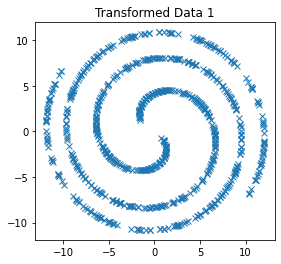

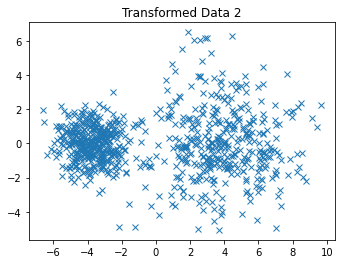

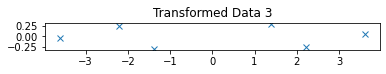

In [4]:
from sklearn.decomposition import PCA
# run PCA analysis
pca = PCA(n_components=2)

# plot projection
Z1=pca.fit_transform(D1)
fig2=plt.figure()
ax2=fig2.add_subplot(1,1,1)
ax2.set_aspect(1)
ax2.set_title('Transformed Data 1')
plt.plot(Z1[:,0],Z1[:,1],"x")

Z2=pca.fit_transform(D2)
fig2=plt.figure()
ax2=fig2.add_subplot(1,1,1)
ax2.set_aspect(1)
ax2.set_title('Transformed Data 2')
plt.plot(Z2[:,0],Z2[:,1],"x")

Z3=pca.fit_transform(D3)
fig2=plt.figure()
ax2=fig2.add_subplot(1,1,1)
ax2.set_aspect(1)
ax2.set_title('Transformed Data 3')
plt.plot(Z3[:,0],Z3[:,1],"x")

Comparing the vairance for datasets:

In [5]:
Z1=pca.fit_transform(D1)
print("\nFor D1: The variance is:")
print(pca.singular_values_)


Z2=pca.fit_transform(D2)
print("\nFor D1: The variance is:")
print(pca.singular_values_)

Z3=pca.fit_transform(D3)
print("\nFor D1: The variance is:")
print(pca.singular_values_)


For D1: The variance is:
[178.28734699 166.15724472]

For D1: The variance is:
[116.35741528  46.82748106]

For D1: The variance is:
[6.30061232 0.54980396]


The results in part (2) confirm the analysis discussed at the start. 

It is vital to understand the significane of variance we calculated in part (3). PCA finds, in the data space, the dimension (direction) with the largest variance out of the overall variance.  Then it finds the dimension of the second largest variance, orthogonal to the first one, which would be second one in our case. If variances are not significantly different, the variance will not be explain the variability in total data. So, in our case, it is desirable to have a major difference in first and second principal components. 

For Data 1, it is very difficult to make out the two classes and also based on the observation of the plot, it can be concluded that variance will not translate well in principal component. This is confirmed on observing the principal components plot in part (2) and variance values in part (3) where the don't have significant difference. However, for Data 2, as per our conclusion, based on plot in (1) and (2), we are able to make out the classes, the variance translates very well and we are also able to see significant difference. Now, for Data 3, the conclusions in Problem (1) are confirmed as well - the two classes can be made out moderately well as per plot (1), the variance translates adequately as per (2) and the variance do have a difference as per (3). 